**Maya Purohit**

CS 251: Data Analysis and Visualization

Fall 2023

Project 4: Principal Component Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from data_transformations import normalize, center

import pca

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2


## Task 3: Analyzing the results of PCA

In this task, you will apply PCA to the Iris dataset and analyze properties of the PCA representation.

### 3a. Import Iris data

In the cell below:
- load in the Iris dataset into a pandas DataFrame.
- select all numeric headers (i.e. drop `species`).
- Print out the head (only showing the first 5 data samples).

You should see (with better formatting):

```
	sepal_length	sepal_width	petal_length	petal_width
0	5.1	3.5	1.4	0.2
1	4.9	3.0	1.4	0.2
2	4.7	3.2	1.3	0.2
3	4.6	3.1	1.5	0.2
4	5.0	3.6	1.4	0.2
```

In [6]:
irisDF = pd.read_csv('data/iris.csv')
irisDF = irisDF.drop(["species"], axis = 1)

irisDF.head()

sepalLength  sepalWidth  petalLength  petalWidth
0          5.1         3.5          1.4         0.2
1          4.9         3.0          1.4         0.2
2          4.7         3.2          1.3         0.2
3          4.6         3.1          1.5         0.2
4          5.0         3.6          1.4         0.2

### 3b. Apply PCA to Iris

You should make the following plots:
1. Elbow plot of cumulative variance accounted for by first $k$ principal components.
2. Written description of your choice of number of PCs preserved and why.
3. Visualization (plot) of PCA projected data on 1st two PCs.

You should normalize the dataset when performing your PCA projection.

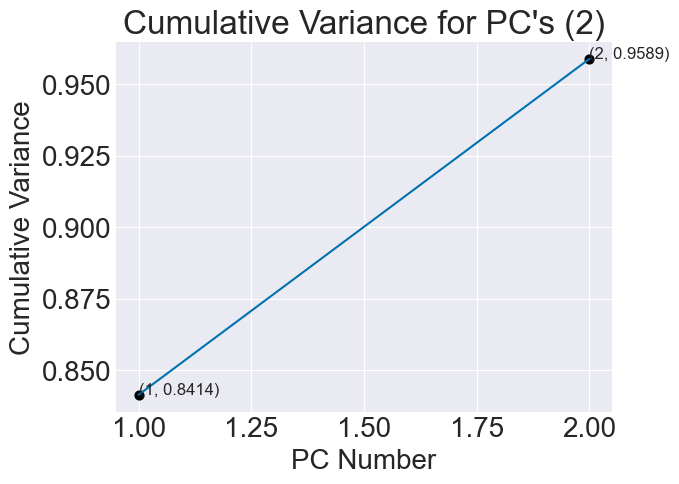

In [7]:
irisPCA = pca.PCA(irisDF) # make a PCA object 
headers = list(irisDF.columns)
irisPCA.pca(headers, normalize_dataset=True) #performs PCA on the given headers 
irisPCA.elbow_plot(2) #elbow plot of the first 3 pcs




2. Written description of your choice of number of PCs preserved and why.

I decided to preserve 2 PCs in the elbow plot above because the first two PCs capture most of the variance in the dataset. The first PC alone captures 84% of the variance in the data, and two PCs capture 96% of all of the variance. Therefore, there is no need to keep the third and the fourth PCs. The first two PCs capture the most important aspects of the data, so it is not necessary to keep the other two PCs. Removing the third and the fourth data will not have a detrimental impact on the viewer understanding the data.

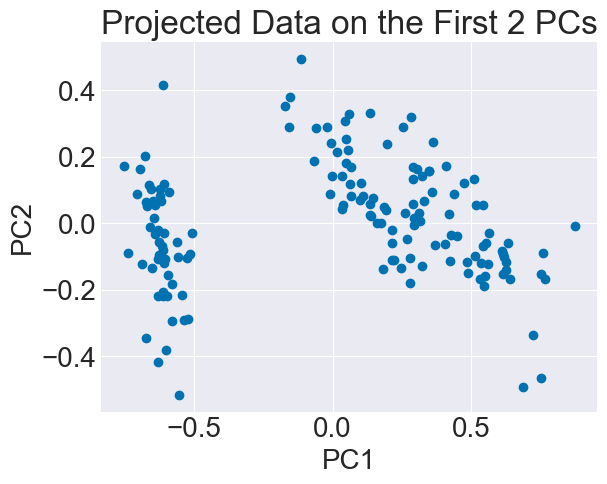

In [8]:
irisPCA.pca_project(pcs_to_keep = np.arange(2)) #project the data onto the first two PCs.



plt.scatter(irisPCA.A_proj[:,0], irisPCA.A_proj[:,1]) #makes a scatter plot of the data projected on the PCs.
plt.title("Projected Data on the First 2 PCs")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

### 3c. Dropping different pairs of principal components

In the cell below, create a "high quality" 2x2 subplots grid of scatter plots that drops different consecutive PCs from the data, then project onto the remaining PCs.

The 2x2 plots should keep:
- (top-left) PCs [3, 4]
- (top-right) PCs [2, 3]
- (bottom-left) PCs [4, 1]
- (bottom-right) PCs [1, 2]

High quality means
- x and y axis label indicating the PC (e.g. PC1)
- title indicating the PCs shown in the plot

You may have to adjust the font/figure sizes to make things legible.

Text(0, 0.5, 'PC2')

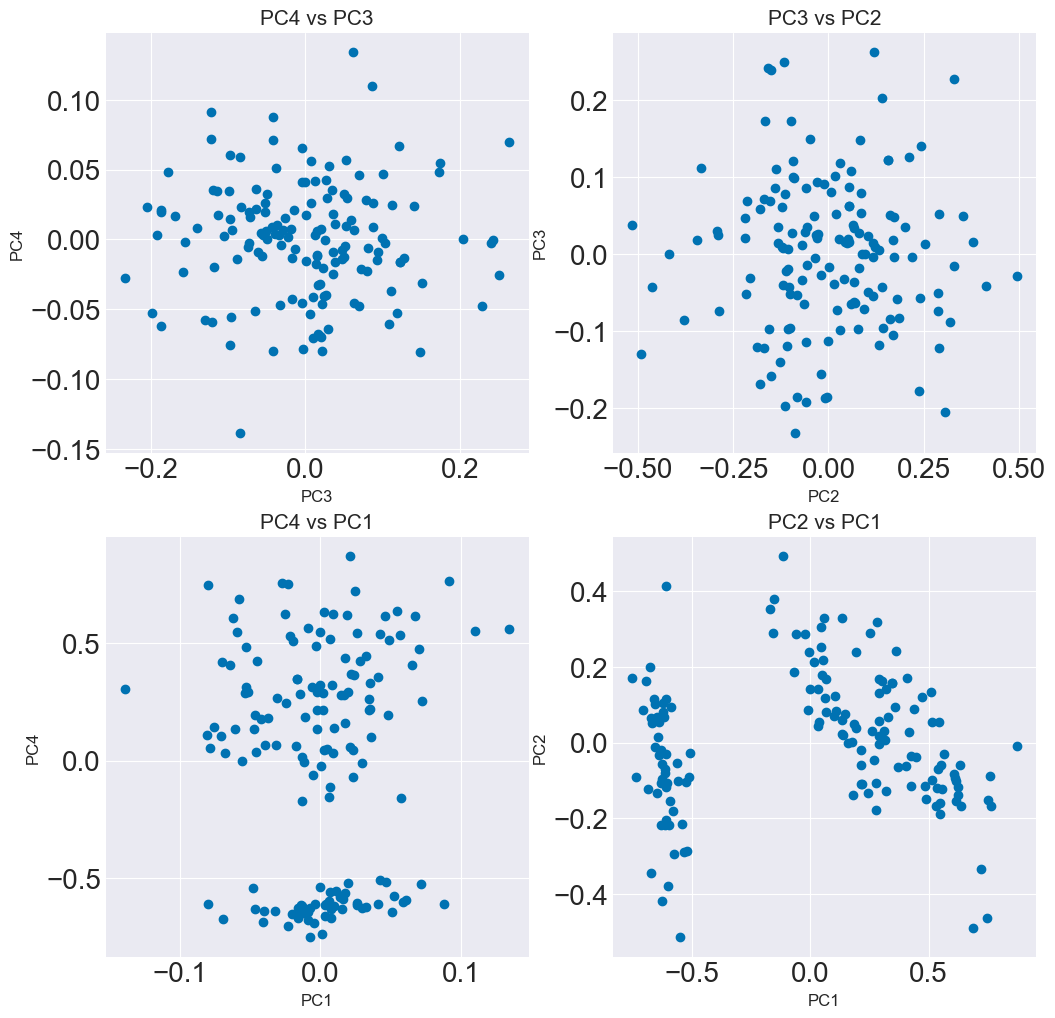

In [9]:
fig, axes = plt.subplots(2,2, figsize = (12,12))
irisPCA.pca_project(pcs_to_keep = [2,3])
axes[0][0].scatter(irisPCA.A_proj[:,0], irisPCA.A_proj[:,1])
axes[0][0].set_title("PC4 vs PC3", fontsize = 15)
axes[0][0].set_xlabel("PC3", fontsize = 12)
axes[0][0].set_ylabel("PC4", fontsize = 12)

irisPCA.pca_project(pcs_to_keep = [1,2])
axes[0][1].scatter(irisPCA.A_proj[:,0], irisPCA.A_proj[:,1])
axes[0][1].set_title("PC3 vs PC2", fontsize = 15)
axes[0][1].set_xlabel("PC2", fontsize = 12)
axes[0][1].set_ylabel("PC3", fontsize = 12)


irisPCA.pca_project(pcs_to_keep = [3,0])
axes[1][0].scatter(irisPCA.A_proj[:,0], irisPCA.A_proj[:,1])
axes[1][0].set_title("PC4 vs PC1", fontsize = 15)
axes[1][0].set_xlabel("PC1", fontsize = 12)
axes[1][0].set_ylabel("PC4", fontsize = 12)

irisPCA.pca_project(pcs_to_keep = [0,1])
axes[1][1].scatter(irisPCA.A_proj[:,0], irisPCA.A_proj[:,1])
axes[1][1].set_title("PC2 vs PC1", fontsize = 15)
axes[1][1].set_xlabel("PC1", fontsize = 12)
axes[1][1].set_ylabel("PC2", fontsize = 12)


### 3d. Questions

**Question 8:** Interpret what the 2x2 grid of plots tells us about keeping different PCs.

**Answer 8:** 
We can see that the graph on the bottom right of the grid resembles the plot above. After projecting the data into the PCA space with different principle components kept, we can see that the graph that keeps PC1 and PC2 shows the most significant trend or shape that is in the data. The plots with PC3 and PC4 and PC2 and PC4 do not have much shape, indicating that PC3 and PC4 are not good indicators of the larger trends in the data. The distinct shape of the data with PC1 and PC2 show us that the first two PCs need to be kept to preserve the most information about the data with the least number of factors. PC3 and PC4 do not show a clear pattern or distinction in the data, so they will not be good indicators of what the data is telling us.

### 3e. Reconstruct data based on PCs

- In `pca_cov.py`, implement `pca_then_project_back`, which projects the data to PCA space, keeping only the top $k$ PCs, then projects from PCA space back onto the original data space.
- In the cell below, create a scatter plot of the two data variables `sepal_length` (x), `sepal_width` (y) of the Iris data **without any normalization**.
- In the 2nd cell below, apply PCA on the Iris dataset **without any normalization** and create a 2x2 grid of scatter plots showing the data reconstruction of the 1st two data variables (`sepal_length`, `sepal_width` — *these are what your axis labels should be*) when keeping the top 1, 2, 3, or 4 (all) principal components.
    - If everything goes well, if you keep all 4 PCs you should get the original dataset back (it should match your `sepal_length`, `sepal_width` plot created one cell above — including the data range and center).

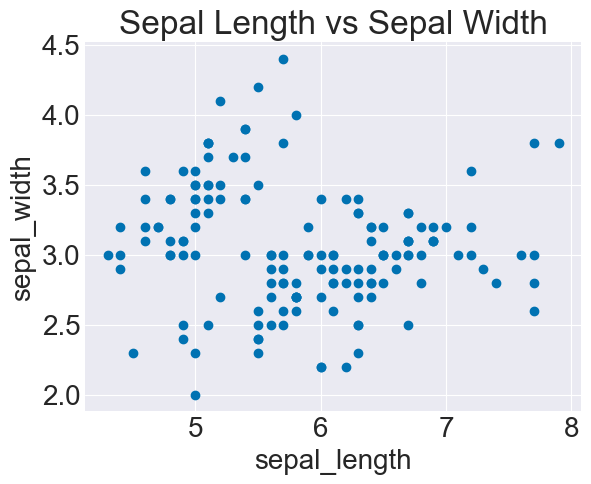

In [10]:
# Plot original iris data

plt.scatter(irisDF['sepalLength'], irisDF['sepalWidth'])
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.title("Sepal Length vs Sepal Width")
plt.show()


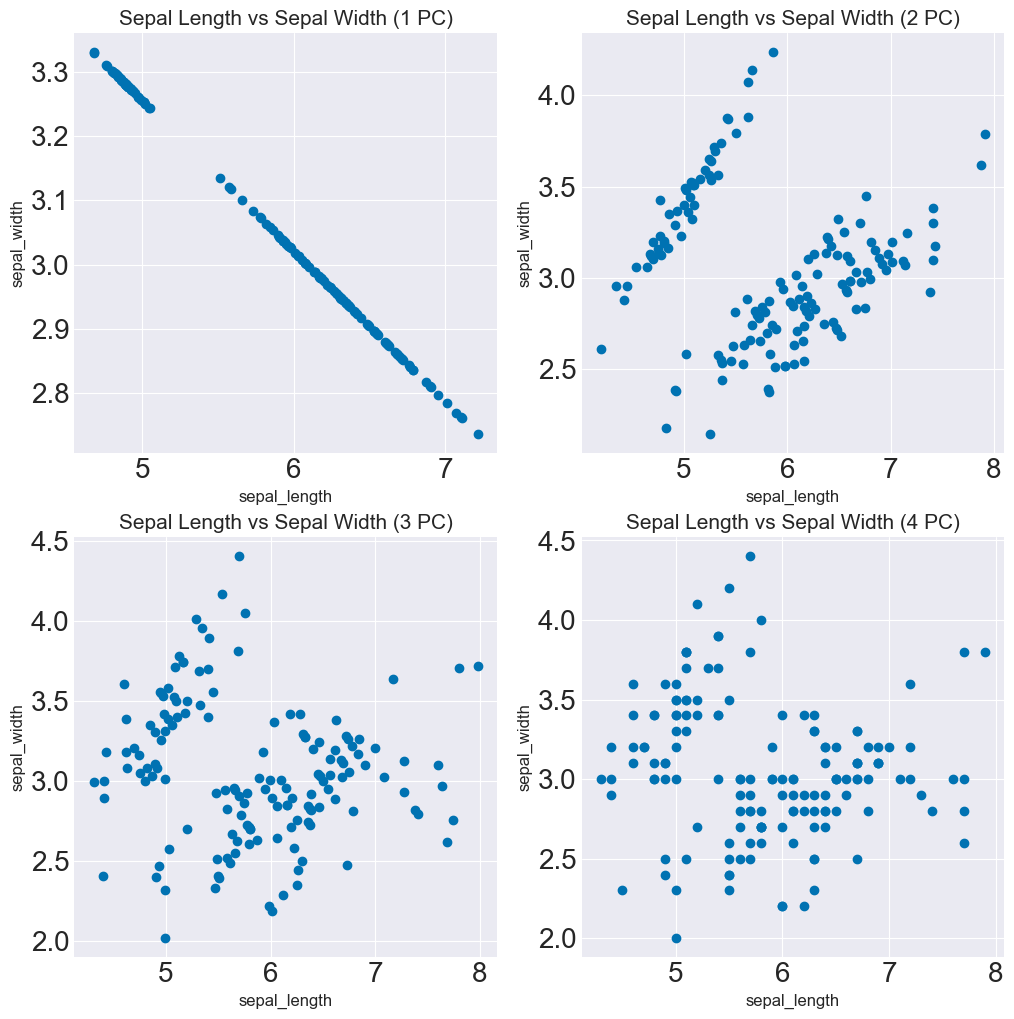

In [11]:
# 2x2 grid of scatter plots
irisPCA2 = pca.PCA(irisDF)
headers = list(irisDF.columns)
irisPCA2.pca(headers, normalize_dataset=False)

fig, axes = plt.subplots(2,2, figsize = (12,12))

for i in range(2):
    Ar = irisPCA2.pca_then_project_back(top_k= i+1) #plot the grid for the two data variables that were projected into the PCA and then data space 
    axes[0][i].scatter(Ar[:, 0], Ar[:,1])
    axes[0][i].set_xlabel("sepal_length", fontsize = 12)
    axes[0][i].set_ylabel("sepal_width", fontsize  = 12)
    axes[0][i].set_title("Sepal Length vs Sepal Width (" + str(i+1) + " PC)", fontsize = 15)

for i in range(2):
    Ar = irisPCA2.pca_then_project_back(top_k= i+3)#plot the grid for the two data variables that were projected into the PCA and then data space with different number of pcs kept
    axes[1][i].scatter(Ar[:, 0], Ar[:,1])
    axes[1][i].set_xlabel("sepal_length", fontsize = 12)
    axes[1][i].set_ylabel("sepal_width", fontsize = 12)
    axes[1][i].set_title("Sepal Length vs Sepal Width (" + str(i+3) + " PC)", fontsize  = 15)








### 3f. Questions

**Question 9:** How well does each of the re-projections preserve properties of the original data? Briefly interpret what the above 2x2 grid means.

**Answer 9:** 

The 2x2 grid represents the shape of the data once it has been projected into the PCA space while only keeping the number of PCs shown in the title. The data are then projected back into the data space to see how the data is preserved when keeping a certain number of PCs. If all of the PCs are kept, the image when it is projected back into the data space should look exactly the same because we don't lose any variance.

Projecting the data back into the data space after maintaining only 1 PC does not resemble the original data at all. The shape of the data is lost and it is unrecognizable. This is because although the first PC accounts for the largest part of the variance, keeping only 1 PC means that a part of the variance will not be kept, meaning data it lost. On the other hand, when we keep 2 PCs, we can see two distinct groups start to form, which somewhat shows the characteristics of the original data. We are only keeping one axis, meaning all of the data will be compressed to this axis. This means that keeping 2 PCs is much more beneficial than only keeping 1 PC. When 3 PCs are kept, the general shape of the original data is shown more. The spacing begins to resemble the original image but there are still many key differences. Keeping 4 PCs means that we keep all of the variance and the image exactly resembles the original data set because no variance was lost. 

### 3g. Implement loading plot

To visualize how the top two principal components relate to original data variables, implement `loading_plot` in `pca.py`.

### 3h. Questions

**Question 10:** Call your `loading_plot` method to generate a loading plot of the Iris dataset. What do the loadings tell us what the first two PCs measure, with respect to the original data axes?

**Question 11:** What do the loadings tell us about correlations among the original data axes?

**Answer 10:** 
PC1 is positively associated with petal length and petal width. Petal width and petal length are not represented by PC2 to a large extent. On the other hand sepal width is negatively associated with PC2 and is minimally represented by PC1. Sepal length is positively correlated with PC1 and negatively correlated with PC2. Since it is between PC1 and PC2, PC1 and PC2 both represent sepal length to an extent. PC1 very strongly represents petal width and petal length and PC2 strongly represents sepal width. Both PC1 and PC2 represent sepal length to less extreme degrees. 


**Answer 11:** 

Among the original data axis, we can see that there is a positive correlation between petal length and petal width. We can see this because there is a very small angle between the two lines representing their loadings with PC1 and PC2. They point in the same direction, meaning that as petal length increases, petal width will also increase (which makes intuitive sense.) There is little to no correlation between petal width, petal length, and sepal width because there is an angle that is a little larger than 90 degrees between them. While there may be a slight negative correlation, the loading plot shows us that changes in petal width and petal length, have very little influence on sepal width. Sepal width seems to be slightly positively correlated with petal length, petal width, and sepal width because it is in between all of the lines. It creates an angle close to 45 degrees with all of the other lines, indicating it has a positive correlation with all of them. As petal length, petal width, and sepal width increase, sepal length will increase to a lesser degree. 

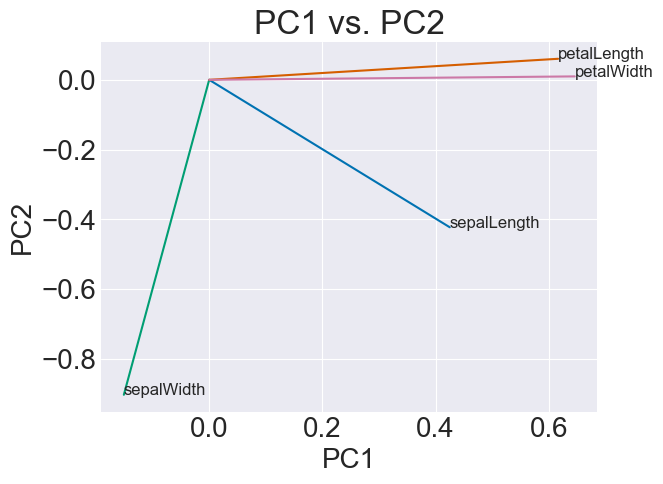

In [12]:
irisPCA.loading_plot()

## Task 4: Eigenfaces — PCA on face images

Here, you will implement the Eigenface algorithm, which involves performing PCA on images of human faces. Here is a link to original paper: https://sites.cs.ucsb.edu/~mturk/Papers/jcn.pdf

*Reference:* M. Turk; A. Pentland (1991). "Eigenfaces for recognition" (PDF). *Journal of Cognitive Neuroscience*. 3 (1): 71–86.

### 4a. Load in LFWcrop face dataset

Run the following cell to load in the face images and labels (which celebrity each face is of).

*More info about LFWcrop face dataset: http://conradsanderson.id.au/lfwcrop/*

In [15]:
face_imgs = np.load('data/lfwcrop.npy')
with open('data/lfwcrop_ids.txt') as fp:
    face_names = fp.read().splitlines()

print(f'There are {len(face_imgs)} faces. There should be 13231.')
print(f'Shape of images is are {face_imgs.shape} faces. It should be (13231, 64, 64).')

print(f'Names of faces match the number of face images? {np.all(len(face_names) == len(face_imgs))}')

There are 13231 faces. There should be 13231.
Shape of images is are (13231, 64, 64) faces. It should be (13231, 64, 64).
Names of faces match the number of face images? True


### 4b. Look at the face data

In the cell below, fill in the function to create a 5x5 subplots grid of plots. In each plot, show one of the first 25 images in the dataset. For the title of the plot, use the corresponding name of the celebrity whose face. For showing the image, use `imshow`: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html

Run the function to create the plot of the faces below.

**Note:**
- When you call `imshow`, add this optional parameter (otherwise faces look ghastly): `cmap=plt.get_cmap('gray')`
- Turn off the x and y ticks (they just add clutter).
- **Before moving on, make sure that the celebrity names match the image!**

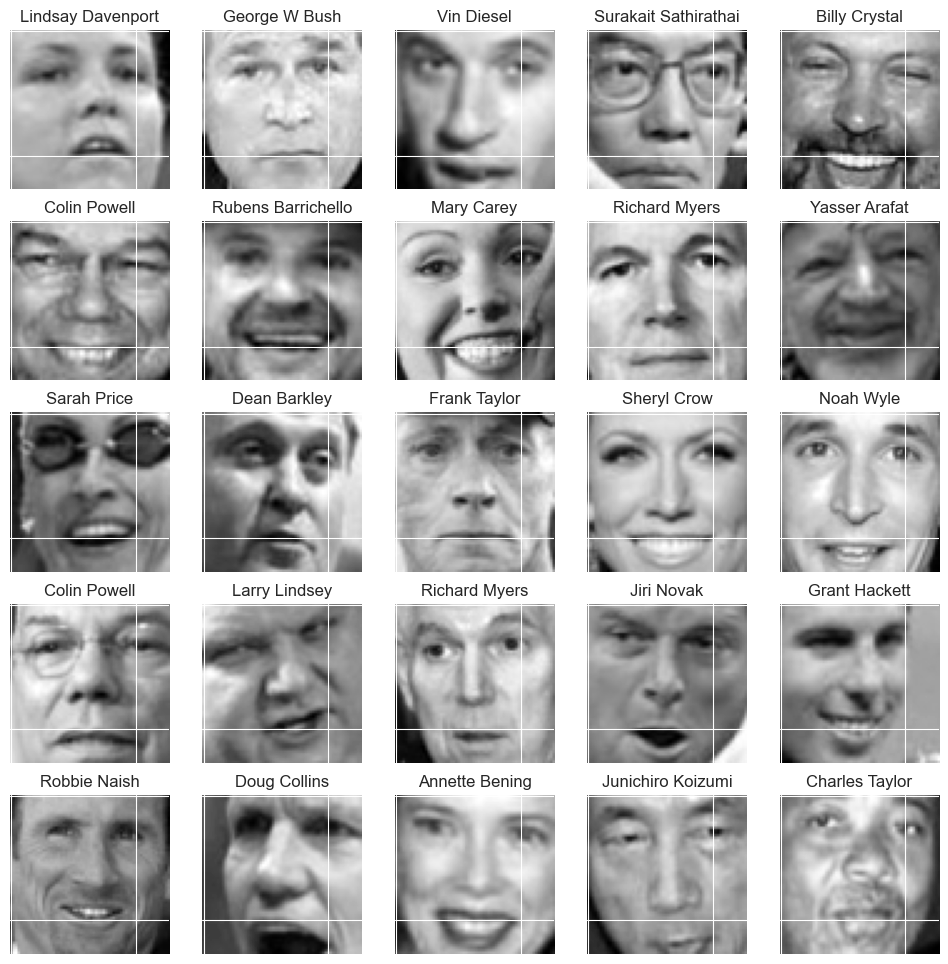

In [16]:
def face_plot(face_imgs, face_names):
    '''Create a 5x5 grid of face images
    
    Parameters:
    -----------
    face_imgs: ndarray. shape=(N, img_y, img_x).
        Grayscale images to show.
    face_names: ndarray. shape=(N,).
        Names of the person in each image represented as strings.
    
    TODO:
    - Create a 5x5 grid of plots of a legible size
    - In each plot, show the grayscale image and make the title the person's name.
    '''
    fig, axes = plt.subplots(5,5, figsize = (12,12)) #makes 25 subplots for the images 
    counter = -1
    for i in range(5):
        for j in range(5):
            counter +=1
            axes[i][j].imshow(face_imgs[counter], cmap=plt.get_cmap('gray')) #plots the image in the grid
            axes[i][j].set_title(face_names[counter], fontsize = 12) #adds the name of the celebrity face as a title 
            axes[i][j].tick_params(left = False, bottom = False, labelleft = False, labelbottom = False) #removes all of the ticks 
    
    


face_plot(face_imgs, face_names)

### 4c. Visualize the "mean face"

Take the mean face image across the dataset and show it below.

**Note:** Use the same `cmap` parameter as above and turn off x and y tick marks.

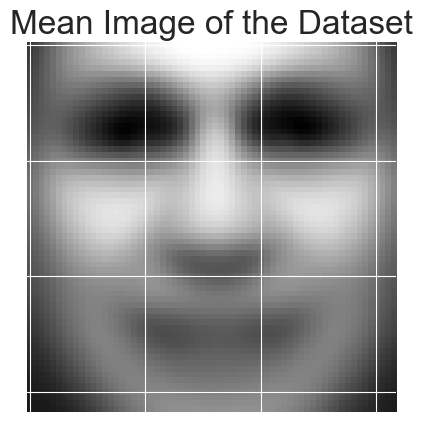

In [12]:
meanIm = np.mean(face_imgs, axis = 0) #finds the mean face using the numpy mean function 
plt.imshow(meanIm, cmap=plt.get_cmap('gray'))
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.title("Mean Image of the Dataset")
plt.show()

### 4d. Preprocess face data

In the face dataset, each person is a sample and each pixel is a variable. Currently, the face data has shape = `(13231, 64, 64)` or $N = 13231$ samples and $M = 64*64 = 4096$ pixels. To run PCA, we'll need to \"unravel\" each row of pixels and glue them into one big vector so that the shape = `(13231, 64*64)` = `(13231, 4096)`. This will make a standard matrix and should work with your PCA code.


- Reshape the face data to make this so. **Do NOT hard code ANY part of the (13231, 64*64)!**

In [21]:
# Your reshape code here

face_imgs_vec = np.reshape(face_imgs, (face_imgs.shape[0], face_imgs.shape[1]*face_imgs.shape[2])) #reshape by multiplying the last two dimensions 

print(f'Your reshaped face images have shape = {face_imgs_vec.shape} and it should be (13231, 4096).')

Your reshaped face images have shape = (13231, 4096) and it should be (13231, 4096).


### 4e. Perform PCA on preprocessed face data

Create pandas DataFrame object that holds the face data then run PCA on the face dataset. The header names of consecutive integers `0, 1, ..., 4095` are fine. For the `vars` parameter in the `pca` method, pass in a Python list of ints (`0, 1, ..., 4095`).

**Note:**
- This is not a "toy" dataset so it might take a few minutes for the PCA to finish computing.
- Use the python `time` module (i.e. `import time`) to time how long the `pca` method takes to finish processing the data, then print out the time elapsed below. If this takes more than a few minutes, something probably is wrong.

In [22]:
import time
faceData = pd.DataFrame(face_imgs_vec)
facePCA = pca.PCA(faceData)
startTime = time.time()
facePCA.pca(np.arange(4096).tolist())
endTime = time.time()
print("Time elapsed: ", endTime - startTime)





Time elapsed:  54.220139265060425


### 4f. Make face PCA elbow plot

Make an elbow plot of the PCA results.

You should readily notice that it is challenging to see how many PCs are required before the curve plateaus. Update your plot below to **only show a reasonable number of PCs** in order to focus on the curve before it plateaus.

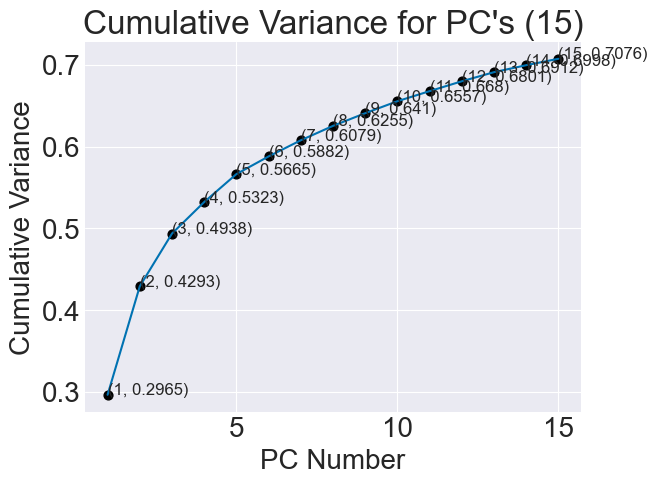

In [23]:
facePCA.elbow_plot(15)


### 4g. Reconstruct faces using the principal components

Use your elbow plot to find the number of top principal components required to *approximately* explain the following cumulative proportion of the variance:
- 50%
- 70%
- 80%
- 95%

Outline of the general process:
1. For each of the above number of PCs, project them back onto the original data space.
2. Write then use the below `make_imgs` function to convert the projected data back to image shapes `(13231, 64, 64)`.
3. Use `face_plot` to plot the reconstructed faces for each of the variance numbers above.

**There should be 4 5x5 plots below**

In [18]:
def make_imgs(reconstructed_imgs):
    '''Inflates a 1D feature vector representation of images into 2D images for plotting.
    Assumes square images
    
    Parameters:
    -----------
    reconstucted_imgs: ndarray. shape=(N, img_y*img_x)
        1D vector representation of each image
    
    Returns:
    -----------
    ndarray. shape=(N, img_y, img_x)
        The images inflated into 2D
    '''

    return np.reshape(reconstructed_imgs, (reconstructed_imgs.shape[0], np.sqrt(reconstructed_imgs.shape[1]).astype(int), np.sqrt(reconstructed_imgs.shape[1]).astype(int))) #reshapes the vectors in the dataset so that they can be displayed as images

#### 50% variance face grid

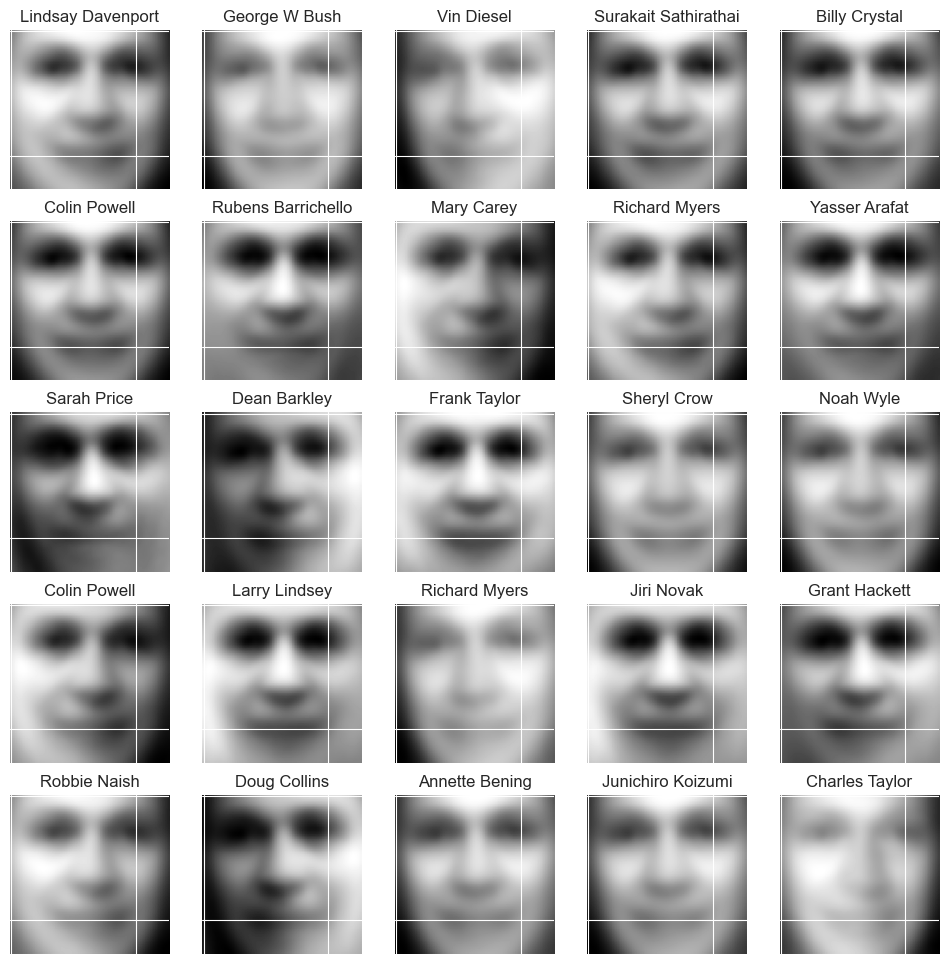

In [24]:
#For a 50% variance grid, the number of PCs to keep is around 3
fiftyVar = facePCA.pca_then_project_back(3)
fiftyVar = make_imgs(fiftyVar)
face_plot(fiftyVar, face_names)




#### 70% variance face grid

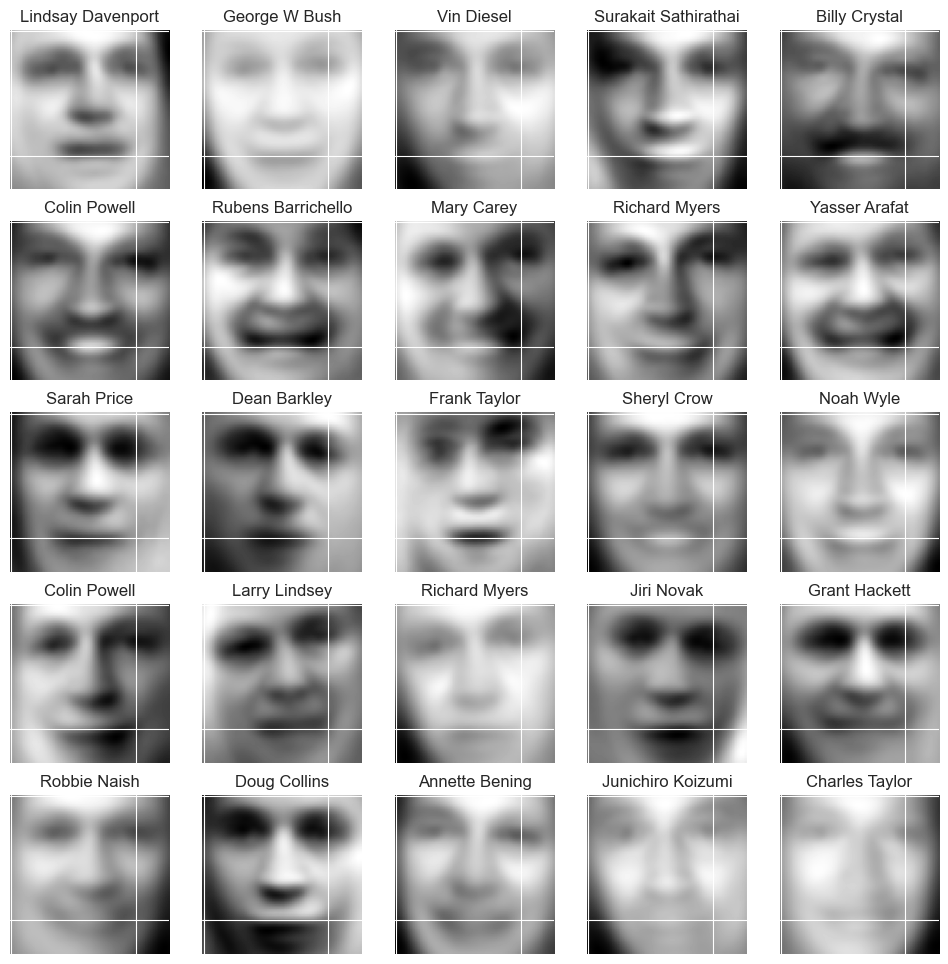

In [18]:
#For 70% variance, the number of PCs to keep is 14
seventyVar = facePCA.pca_then_project_back(14)
seventyVar = make_imgs(seventyVar)
face_plot(seventyVar, face_names)


#### 80% variance face grid

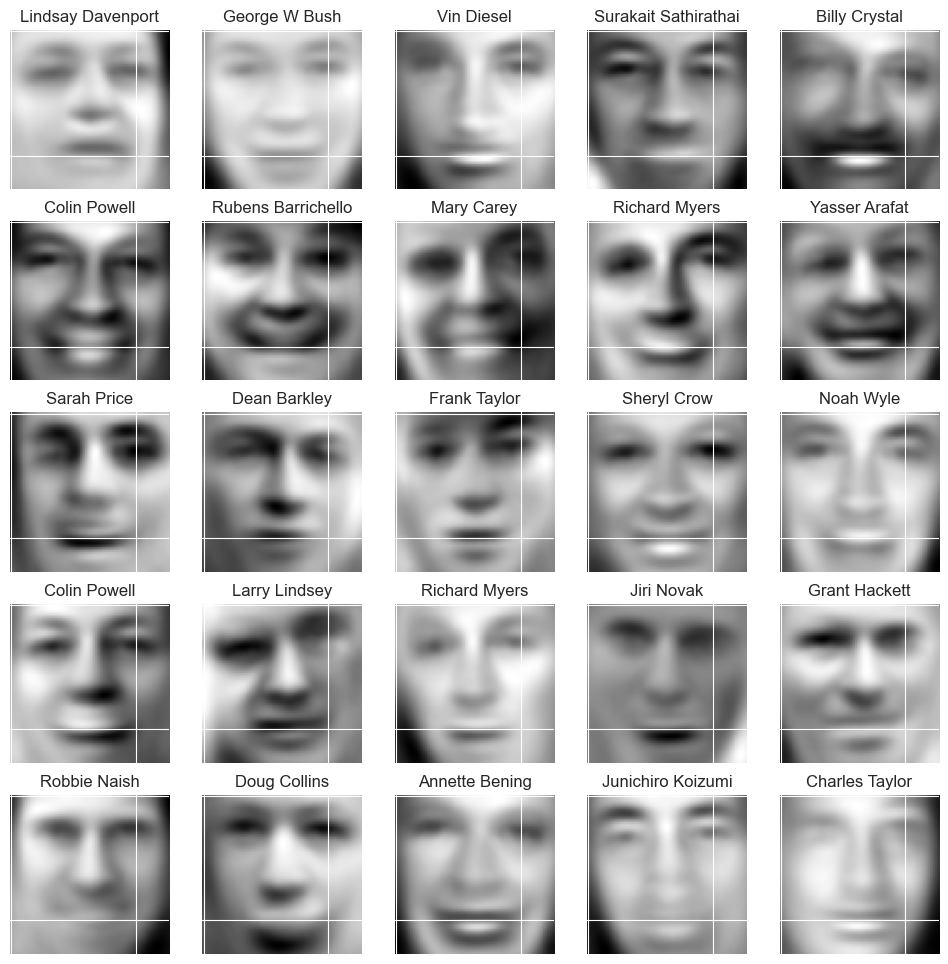

In [19]:
#For 80% variance, the number of PCs to keep is 33
eightyVar = facePCA.pca_then_project_back(33)
eightyVar = make_imgs(eightyVar)
face_plot(eightyVar, face_names)

#### 95% variance face grid

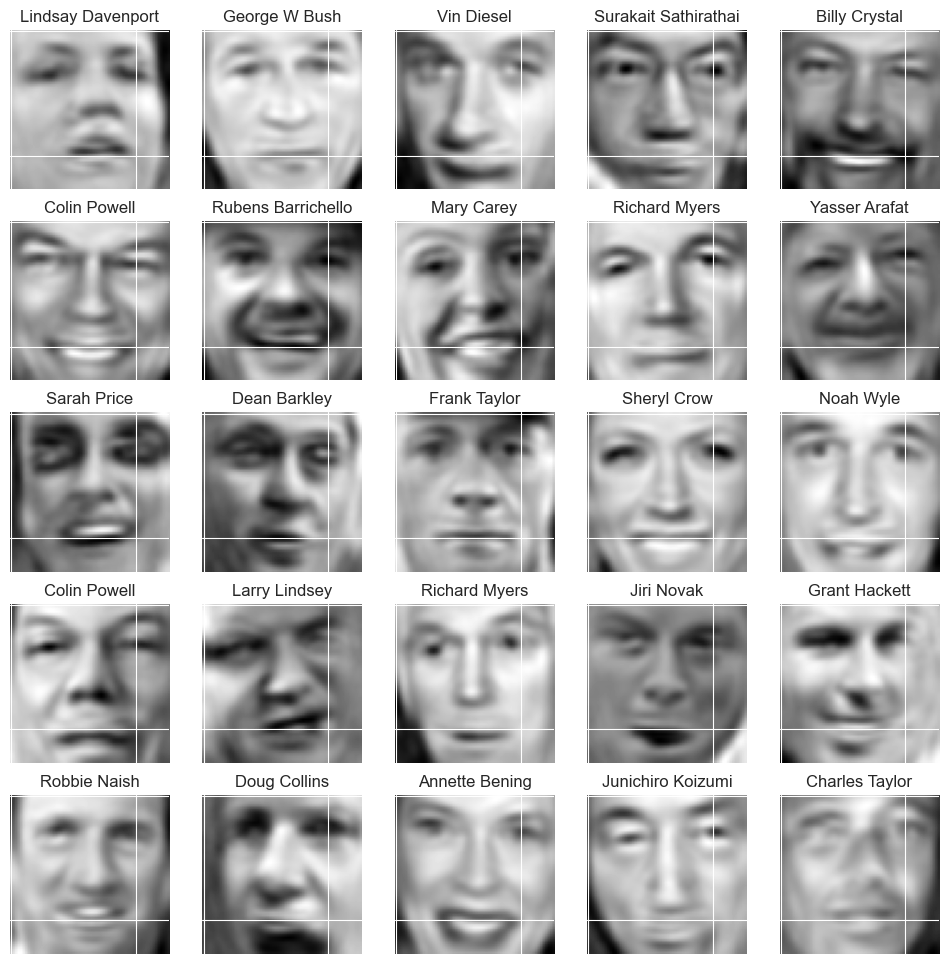

In [20]:
#For 95% variance, keep 179 PCs
ninFiveVar = facePCA.pca_then_project_back(179)
ninFiveVar = make_imgs(ninFiveVar)
face_plot(ninFiveVar, face_names)

### 4h. Questions

**Question 12:** What does the "mean face" image represent?

**Question 13:** Briefly interpret the face reconstruction with the above choices of proportion variance explained.

**Answer 12:** 

The mean face tells us what the average characteristics of a face are by finding the average value of each pixel within the 64x64 image. Each of the 64x64 image representations are added together and divided by the number of images there are. This means that each pixel value in the "mean" 64x64 image is the average pixel value in that location in the matrix for all of the images. The resulting 64x64 image represents the average characteristics of all of the faces. When we find the mean on axis = 0, we find the mean values for each pixel in the image, resulting the average pixel value at each position being used to find the mean image. 

**Answer 13:** 

When we keep 50% of the variance (meaning we have to keep around 3 of the PCs), we can see that many of the faces resemble the mean face. It is hard to dinstinguish the faces from one another because a lot of the variance that makes them distinct is not included in the projection into the PCA space. In this dataset, we can see that the first PC holds the largest percentage of variance but it does not account for a significant amount. Therefore, we have the include more PCs until a plateau is hit in the elbow plot. As we increase the amount of variance we preserve by increasing the number of PCs that we keep in the projection, the faces start to become more detailed and more recognizable because we keep more of the data axis that show variation in the data. When we keep more information about each image, we get clearer and more accurate images. In order to keep 95% of the variance, we had to keep 179 PCs, which is more costly but provides better images.We get further away from the average face as we increase the variance kept. 

## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

**Reminder:** Give credit to all sources, including anyone that you consulted.

**Note about CSV files:** Please try if at all possible to use pandas `read_csv` method with the URL argument in your submitted notebook extensions (should be possible if you downloaded your CSV file off the internet). This way, graders will be able to download the same data and you won't have to remember to copy over the CSV file with your project submission (this is welcome too). Remember the 10MB rule though for filer submissions.

### 1. Your own dataset

- Do PCA on a dataset of your choice. Use any of the canonical analysis tools (e.g. elbow plot, proportion variance explained, loading plot, etc) to inform your analysis and exploration. 

I received the following dataset at: https://github.com/essanhaji/face_recognition_pca/tree/master/data

There are 400 faces. There should be 400.
Shape of images is are (400, 64, 64) faces. It should be (400, 64, 64).


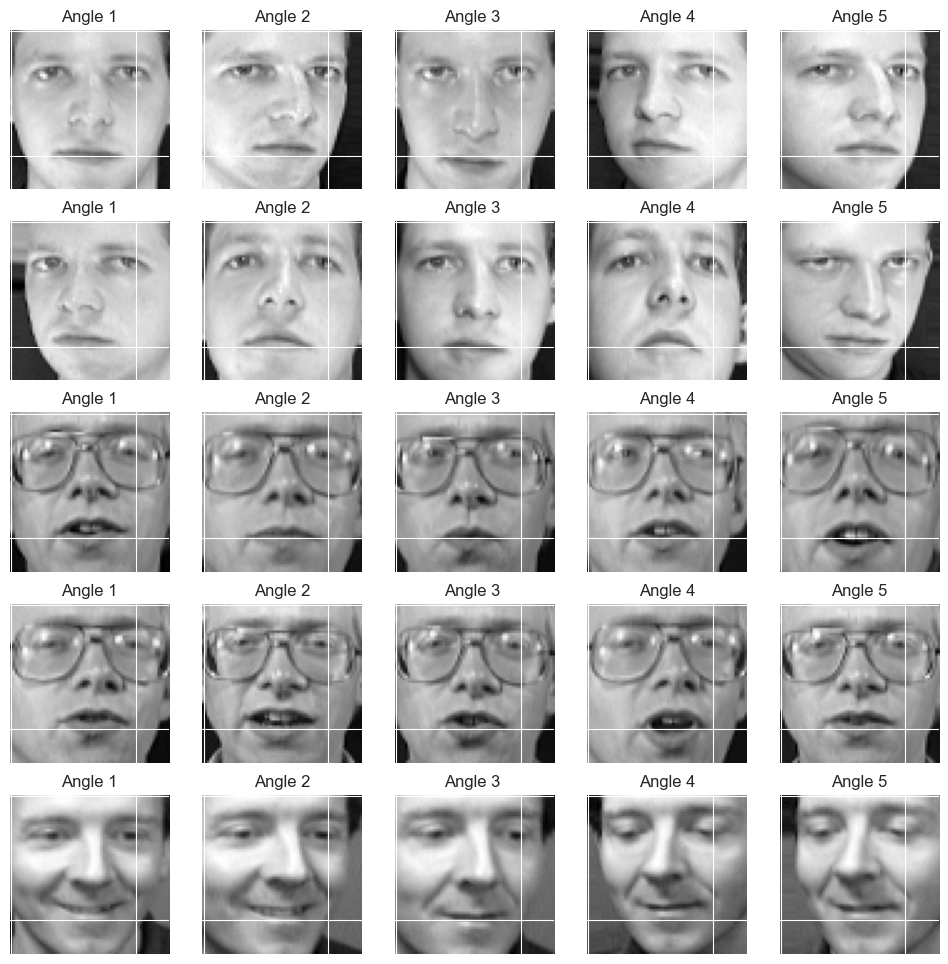

In [191]:
o_imgs = np.load('data/olivetti_faces.npy')
with open('data/olivetti_faces_ids.txt') as fp:
    o_names = fp.read().splitlines()

print(f'There are {len(o_imgs)} faces. There should be 400.')
print(f'Shape of images is are {o_imgs.shape} faces. It should be (400, 64, 64).')
face_plot(o_imgs, o_names)



Text(0.5, 1.0, 'Mean Image of the Dataset')

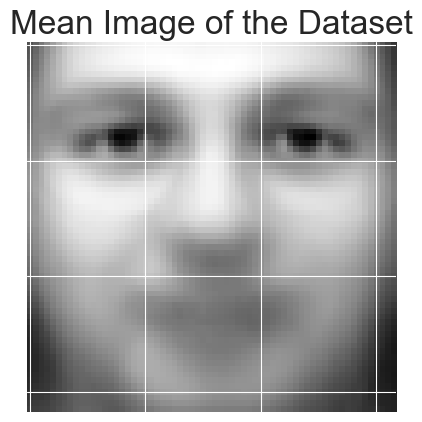

In [263]:
meanIm = np.mean(o_imgs, axis = 0) #finds the mean face using the numpy mean function 
plt.imshow(meanIm, cmap=plt.get_cmap('gray'))
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.title("Mean Image of the Dataset")

In [276]:
o_images_vec = np.reshape(o_imgs, (o_imgs.shape[0], o_imgs.shape[1]*o_imgs.shape[2]))
oData = pd.DataFrame(o_images_vec)
oPCA = pca.PCA(oData)
oPCA.pca(np.arange(4096).tolist())



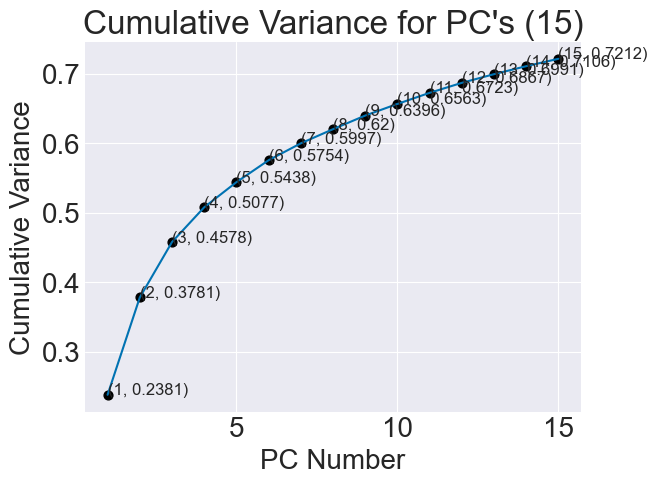

In [286]:
oPCA.elbow_plot(15)

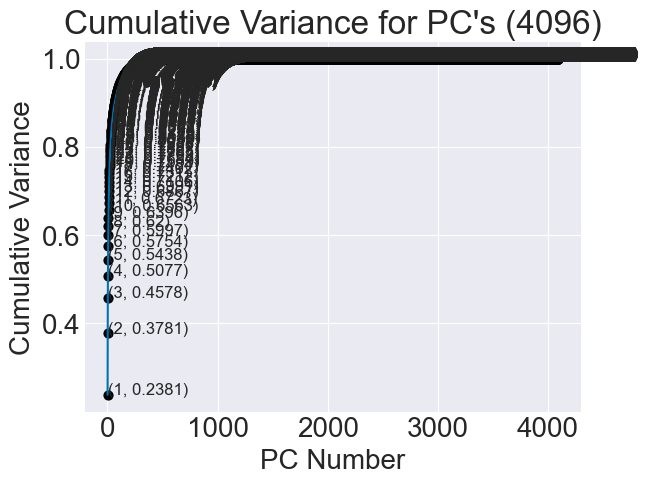

In [287]:
oPCA.elbow_plot()

We can see in the elbow plot where only 15 PCs that there is a gradual ascent rather than a sharp plateau. The graph gives the impression that each PC holds a somewhat significant portion of the variance and that we will need to include more PCs to retain a large amount of variance. However, when we plot all of the PCs, we can see that there is a very sharp at around 40 PCs. The variance that each PC contributes is miniscule for the remaining 4,000 PCs. Therefore, we can lose a lot of the PCs and still keep a large portion of the variance in the data. Keeping 40 PCs out of the 4096 PCs will still give us most of the variation in the data.

### 2. Image compression

- Run PCA on your own images and analyze the trade-off in compression and reconstruction error.



50% variance

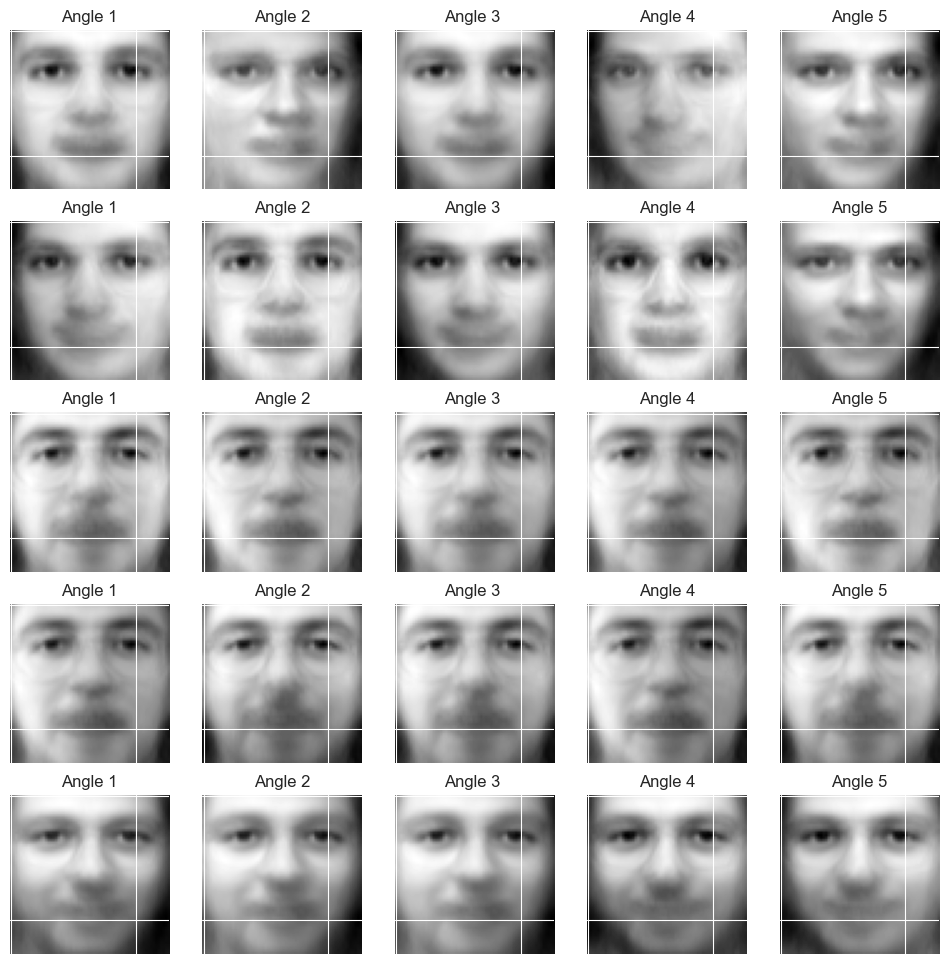

In [279]:

fiftyVar = oPCA.pca_then_project_back(4)
fiftyVar = make_imgs(fiftyVar)
face_plot(fiftyVar, o_names)

In this grid, we can see that a lot of the images resemble the mean image. We can see the outline of glasses on all of the photos even though they only appear in the second half of the images.  Since we are only keeping 50% of the variance, we don't keep many of the features that make the images distinct. This shows that we need to keep more of the variance

95% variance

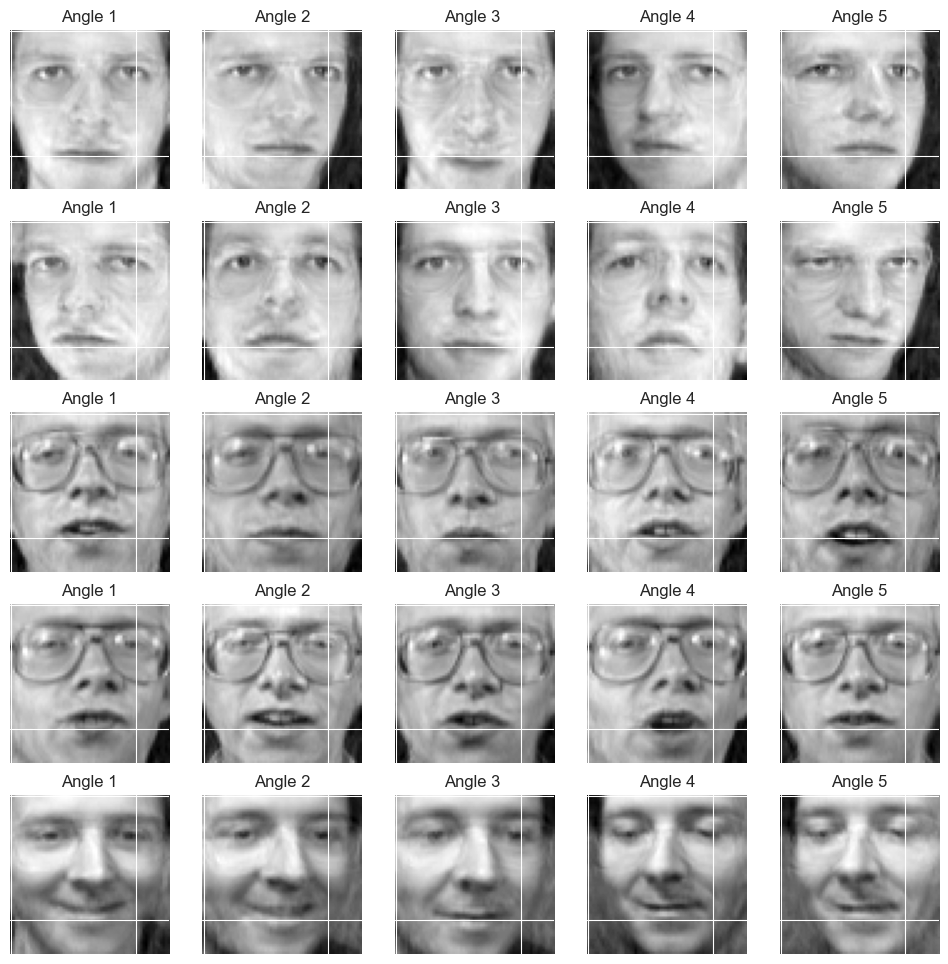

In [282]:

ninFive = oPCA.pca_then_project_back(123)
ninFive = make_imgs(ninFive)
face_plot(ninFive, o_names)

When retaining 95% of the variance, the distinct features of the face can be seen, but it is still not the same as the original image. Images that did not have glasses still have glasses outlines in the feature. Since the elbow plot for this dataset is so steep, I believe that it is worth it to keep 95% of the variance. We are able to capture 95% of the variance with only 123 PCs. We still drop around 4000 PCs, meaning that keeping 95% of the variance is definitely worth the trade off of more PCs.

### 3. Facial recognition with Eigenfaces

You can use Eigenfaces to perform facial recognition! Here is the idea:

1. Perform PCA on images of faces of people who you would like to be able to "learn" to recognize (creating a "database" of known faces). This is just like what you did in the main project.
2. Project a "query" image of a face that you would like to recognize into the PCA space established by the database of known faces (the number of PCA dimensions is up to you).  
3. Project each of the images in the face database into the same PCA space established by the database of known faces (the number of PCA dimensions is the same as before).
4. Treat the projected query image and each projected database images as vectors. Compute the Euclidean distance of the vector obtained by subtracting that of the query image and that of each database image.
5. Pick a match tolerance level. If any of the distances is less than your tolerance level, you have a match! If none of the distances is smaller than your tolerance, you don't have a match.

The first instance of the celebrity you selected appearing in the dataset is in row 74
There are 210 potential matches for your selected celebrity in the dataset


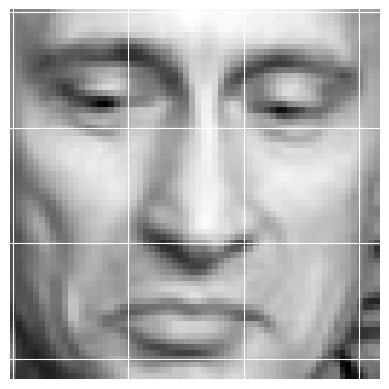

In [26]:
maxTolerance = 2100 #this is the max distance that can be between two of the vectors 

indToFace = {} #this is a dictionary that will map each celebrity name to the index that their image is held. This way we can perform facial recognition for a celebrity by using their name

for i in range(len(face_names)): #makes a dictionary that maps the celebrity name to the index they are associated with 
    if(face_names[i] in indToFace.keys()):
        continue
    else:
        indToFace[face_names[i]] = i

name = input("Please enter a valid name for a celebrity: ") #allows the user to choose which celebrity they want the algorithm to perform facial recognition on

query_image = face_imgs_vec[indToFace[name],:]

query_image = query_image.reshape(1, 4096)

p = facePCA.e_vecs[np.ix_(np.arange(facePCA.e_vecs.shape[0]), np.arange(179))] #makes the rotation matrix with the pcs we want to keep. We use the eigenvectors for the database of images.
#here, we maintain 95% of the variance to make the facial recognition more accurate
query_proj = (query_image - facePCA.orig_means) @ p #we project the query image into the PCA space of the faces database using the eigenvectors of the database 


facePCA.pca_project(np.arange(179)) #we also project the faces into the PCA space


squared_diff = np.square(facePCA.A_proj - query_proj) #the following lines find the distance between the query image vector and each of the face image vectors in the database to see which have the smallest distance between them
sumArray = np.sum(squared_diff, axis = 1) #the image vectors with the smallest distance vectors are the most likely to be the same or represent the same person 
distances = np.sqrt(sumArray) 

#print(distances.shape) #has a shape of (13231,) because this is the total number of faces in the dataset
#if the dist = 0, we found the face

exactMatch = distances < 1 #means we have the exact picture 
index = np.asarray(exactMatch == True).nonzero() #finds the index where the distance is basically equal to 0
print("The first instance of the celebrity you selected appearing in the dataset is in row", index[0][0]+1 )
partialMatch = np.sum(distances <= maxTolerance) #finds the potential matches using logical indexing
print("There are "+ str(partialMatch) + " potential matches for your selected celebrity in the dataset")
plt.imshow(face_imgs[index[0][0]], cmap=plt.get_cmap('gray'))
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.show()










